### 1. 데이터 로드 및 전처리

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib
import warnings

# #한글깨짐 방지
# matplotlib.rcParams['font.family'] ='Malgun Gothic'
# matplotlib.rcParams['axes.unicode_minus'] =False

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 위치 설정
data = pd.read_csv(URL+"data/class_balance.csv",encoding="EUC-KR")

In [ ]:
# data=pd.read_csv("./data/class_balance.csv",encoding="EUC-KR")

In [ ]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X466,X467,X468,X469,X470,X471,X472,X473,X474,Y
0,0.457896,0.530189,0.276976,0.359864,0.193059,0.322190,0.706897,0.553781,0.653894,0.375204,...,0.246376,0.711806,0.008532,0.013672,0.008467,0.402240,0.238811,0.274876,0.210238,-1
1,0.607100,0.341478,0.518992,0.395300,0.042071,0.469654,0.750000,0.542031,0.447466,0.189233,...,0.523785,0.760417,0.030930,0.033203,0.029759,0.210356,0.309339,0.328358,0.439175,-1
2,0.360781,0.369653,0.341039,0.021697,0.181737,0.528684,0.491379,0.516722,0.300371,0.376835,...,0.185769,0.659722,0.005333,0.003906,0.005311,0.381877,0.208171,0.208955,0.155761,-1
3,0.460910,0.413500,0.535685,0.302794,0.242326,0.408966,0.646552,0.561615,0.415328,0.313214,...,0.246376,0.000000,1.000000,1.000000,1.000000,0.381877,0.208171,0.208955,0.155761,-1
4,0.263068,0.279821,0.535685,0.302794,0.242326,0.408966,0.646552,0.638747,0.660074,0.520392,...,0.110711,0.517361,0.023677,0.022461,0.023447,0.608414,0.212062,0.268657,0.092827,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.360022,0.396033,0.382803,0.070771,0.143308,0.920884,0.586207,0.636336,0.337454,0.432300,...,0.000000,0.597222,0.016212,0.013672,0.015997,0.045307,0.147860,0.171642,0.000000,1
250,0.508628,0.437628,0.192378,0.061866,0.168425,0.481919,0.715517,0.270563,0.407911,0.336052,...,0.132582,0.975694,0.017065,0.015625,0.016114,0.543689,0.227626,0.320896,0.111165,1
251,0.275930,0.364365,0.302236,0.376615,0.485135,0.627270,0.594828,0.435673,0.420272,0.367047,...,0.246376,0.586806,0.008532,0.015625,0.008613,0.343042,0.151751,0.164179,0.143012,1
252,0.785179,0.271804,0.400189,0.457851,0.229526,0.244320,0.396552,0.875565,0.110012,0.337684,...,0.221768,0.767361,0.024317,0.019531,0.023461,0.509709,0.398833,0.440299,0.185945,1


In [ ]:
data['Y'] = data['Y'].map(lambda x: 0 if x == -1 else 1) # 기존 -1, 1이었던 Y값을 모델 학습을 위해 0, 1로 변경

In [ ]:
# X, Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(3)

# X
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22,shuffle =True)

[[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)]  
**sklearn.model_selection.train_test_split**
- **test_size** : float or int, default = 0.25, 정수값일시 test사이즈로 설정하고 싶은 샘플 수 입력
- **train_size** : float or int, default = None
- **random_state** : int, default = None, 랜덤 seed값 설정, 같은 seed 내에선 동일결과 추출
- **shuffle** : bool, default = True, 데이터셋 무작위 추출, 시계열 데이터와 같이 순차적 추출이 필요한 경우엔 Shuffle = False!
- **stratify** : array-like, default = None, True일시 계층적 샘플링 진행 ([참고](https://www.investopedia.com/terms/stratified_random_sampling.asp))

### 2. 평가 지표 함수

![Confusion Matrix](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

###### 이미지 출처 : https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

In [ ]:
# 평가 지표 출력 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

def print_all_reg(Y_test,pred):
    # Specificity를 구하기 위해 confusion matrix를 이용
    cm1 = confusion_matrix(Y_test,pred)
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    #결과 검사
    #recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    #pre = cm1[1,1]/(cm1[1,1]+cm1[0,1])

    G_mean = recall_score(Y_test,pred) * specificity1

    print("model의 recall 값은 {:.3f}".format(recall_score(Y_test,pred)))
    print("model의 2종 오류 확률 값은 {:.3f}".format(1-recall_score(Y_test,pred)))
    print("model의 Specificity 값은 {:.3f}".format(specificity1))
    print("model의 1종 오류 확률 값은 {:.3f}".format(1-specificity1))
    print("model의 precision 값은 {:.3f}".format(precision_score(Y_test,pred)))
    print("model의 f1_score 값은 {:.3f}".format(f1_score(Y_test,pred)))
    print("model의 G-mean 값은 {:.3f}".format(np.sqrt(G_mean)))
    print("model의 accuracy 값은 {:.3f}".format(accuracy_score(Y_test,pred)))


# Light GBM

[[LightGBM Parameters](https://lightgbm.readthedocs.io/en/stable/Parameters.html)]
### **주요 파라미터**
- **n_estimators** : 학습할 부스팅 트리의 수. 기본값은 100이며, 모델이 과적합되지 않도록 적절한 값을 설정해야 함
- **learning_rate** : 각 트리가 학습하는 속도를 제어하는 파라미터로 값이 작을수록 모델은 더 천천히 학습하지만 일반화 성능이 향상될 수 있음. 일반적으로 0.01에서 0.1 사이의 값을 사용합니다.
- **num_leaves** : 하나의 트리가 가질 수 있는 최대 리프 노드 수로, 이 값이 클수록 모델의 복잡성이 증가함. 기본값은 31이며, 일반적으로 20에서 40 사이의 값을 사용함.
- **max_depth** : 트리의 최대 깊이로 모델의 복잡성을 제한하여 과적합을 방지함. 기본값은 -1(제한 없음)이며, 일반적으로 3에서 10 사이의 값을 사용함.
- **min_child_weight** : 리프 노드가 되기 위한 최소 가중치로 값이 클수록 리프 노드는 더 많은 데이터를 포함하여 과적합이 줄어듦.
- **colsample_bytree** : 각 트리를 학습할 때 사용할 피처의 비율. 0.5는 피처의 절반을 무작위로 선택하는 것을 의미합니다. 과적합을 방지하는 데 유용함.
- **subsample** : 각 트리를 학습할 때 사용할 데이터 샘플의 비율로 1.0은 모든 데이터를 사용한다는 의미임. 과적합을 줄이기 위해 사용됨.
- **reg_lambda** : L2 정규화 항. 모델의 복잡성을 줄이고 과적합을 방지함.
- **reg_alpha** : L1 정규화 항. 모델의 복잡성을 줄이고 과적합을 방지함.

### **Gradient-Based One-Side Sampling (GOSS)관련 파라미터**
- data_sample_strategy ='goss' 로 설정 (기본은 'bagging')
- **top_rate** : 잔차값이 큰 상위 데이터 샘플의 비율을 지정함
  
 - 예를 들어, top_rate=0.2로 설정하면 상위 20%의 샘플이 선택됨

- **other_rate** : 나머지 데이터 샘플 중에서 무작위로 선택할 샘플의 비율을 지정함
  
 - 예를 들어, other_rate=0.1로 설정하면 나머지 데이터 샘플 중에서 10%가 무작위로 선택됨

In [ ]:
import lightgbm as lgb
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import logging

# 경고 수준 설정
logging.getLogger('lightgbm').setLevel(logging.ERROR)

In [ ]:
# 검증용 데이터셋 정의
eval_set = [(X_test, Y_test)]

# 하이퍼파라미터 값 목록 정의
top_rate_list = [0.01,0.02,0.05,0.1]
learning_rate_list = [0.1, 0.2, 0.3]

train_scores = []
test_scores = []
warnings.filterwarnings("ignore", category=UserWarning)
# 모든 num_leaves와 learning_rate 값에 대하여 모델 적합, 최적의 값 도출
for top_rate in top_rate_list:
    for lr in learning_rate_list:
        clf = lgb.LGBMClassifier(data_sample_strategy ='goss',
                                 n_estimators=200,
                                 learning_rate=lr,
                                 num_leaves=50,
                                 min_child_weight=3,
                                #  colsample_bytree=0.5,
                                 max_depth=-1,
                                 reg_lambda=0.1,
                                 top_rate=top_rate,        # GOSS 관련 파라미터
                                 other_rate=0.4,           # GOSS 관련 파라미터
                                 early_stopping_round=15
                                 ,verbose=-1)

        clf.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])


        preds_train = clf.predict(X_train)
        preds = clf.predict(X_test)

        train_scores.append(f1_score(Y_train, preds_train, average='weighted'))
        test_scores.append(f1_score(Y_test, preds, average='weighted'))

# 최적의 하이퍼파라미터 도출
best_index = np.argmax(test_scores)
best_top_rate = top_rate_list[best_index // len(learning_rate_list)]
best_lr = learning_rate_list[best_index % len(learning_rate_list)]
print(f"최적의 top_rate 값: {best_top_rate}")
print(f"최적의 learning_rate 값: {best_lr}")



최적의 top_rate 값: 0.05
최적의 learning_rate 값: 0.3


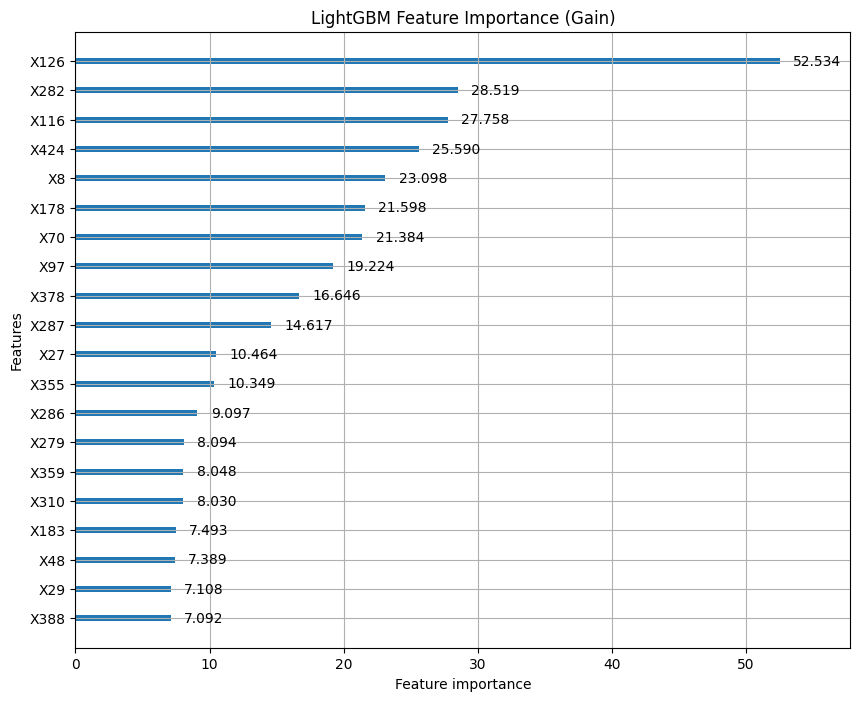

In [ ]:
# 최적의 하이퍼파라미터로 최종 모델 학습
final_clf = lgb.LGBMClassifier(n_estimators=200,
                               learning_rate=best_lr,
                               top_rate=best_top_rate,
                               num_leaves=50,
                               min_child_weight=3,
                               colsample_bytree=0.5,
                               max_depth=8,
                               reg_lambda=0.8
                               ,verbose=-1)

final_clf.fit(X_train, Y_train, eval_set=eval_set)

# 최종 모델 평가
final_preds = final_clf.predict(X_test)

# 변수 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 8))
lgb.plot_importance(final_clf, max_num_features=20, importance_type='gain', ax=ax)
plt.title('LightGBM Feature Importance (Gain)')
plt.show()

In [ ]:
print_all_reg(Y_test, final_preds)

model의 recall 값은 0.833
model의 2종 오류 확률 값은 0.167
model의 Specificity 값은 0.939
model의 1종 오류 확률 값은 0.061
model의 precision 값은 0.882
model의 f1_score 값은 0.857
model의 G-mean 값은 0.885
model의 accuracy 값은 0.902


# CatBoost

[[CatBoost Parameters](https://docs.aws.amazon.com/ko_kr/sagemaker/latest/dg/catboost-hyperparameters.html)]
### **주요 파라미터**
- **boosting_type** : CatBoost에서 부스팅 방식을 결정함
  - 'Ordered': 각 데이터 포인트는 이전 데이터 포인트들을 사용하여 순차적으로 학습함. 데이터 순서로 인한 편향을 줄이고 과적합을 방지합
  - 'Plain': 데이터 순서에 상관없이 전체 데이터 세트를 사용하여 학습함
- **n_estimators** : 학습할 부스팅 트리의 수. 기본값은 100이며, 모델이 과적합되지 않도록 적절한 값을 설정해야 함
- **learning_rate** : 각 트리가 학습하는 속도를 제어하는 파라미터로 값이 작을수록 모델은 더 천천히 학습하지만 일반화 성능이 향상될 수 있음. 일반적으로 0.01에서 0.1 사이의 값을 사용합니다.
- **num_leaves** : 하나의 트리가 가질 수 있는 최대 리프 노드 수로, 이 값이 클수록 모델의 복잡성이 증가함. 기본값은 31이며, 일반적으로 20에서 40 사이의 값을 사용함.
- **depth** :  트리의 최대 깊이로 모델의 복잡성을 제한하여 과적합을 방지함. 일반적으로 3에서 10 사이의 값을 사용함.
- **l2_leaf_reg** : 리프 노드에 대한 L2 정규화 항. 모델의 복잡성을 줄이고 과적합을 방지하며, 기본값은 3.
- **bagging_temperature** : 데이터 샘플링에 사용되는 온도로 이 값이 높을수록 샘플링된 데이터의 다양성이 커짐. 과적합을 방지하는 데 유용함.
- **random_strength** : 트리 분할에 대한 랜덤성을 제어하며 값이 클수록 분할이 더 무작위로 수행됨. 과적합 방지를 위해사용함
- **border_count(max_bin)** : 수치형 피처를 이진화할 때 사용할 경계의 수로, 피처의 다양성을 증가시키기 위해 사용됨.
- **eval_metric** : 기본값은 Logloss이며, Accuracy, AUC 등 다양한 메트릭을 사용할 수 있음.


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 1.8 MB/s eta 0:00:00


In [ ]:
import catboost as cb
from catboost import CatBoostClassifier

In [ ]:
# 검증용 데이터셋 정의
eval_set = [(X_test, Y_test)]

# 하이퍼파라미터 값 목록 정의
depth_list = [6, 8, 10, 12]
learning_rate_list = [0.1, 0.01, 0.05]

train_scores = []
test_scores = []

# 모든 depth와 learning_rate 값에 대하여 모델 적합, 최적의 값 도출
for depth in depth_list:
    for lr in learning_rate_list:
        clf = CatBoostClassifier(n_estimators=200,
                                 learning_rate=lr,
                                 depth=depth,
                                 l2_leaf_reg=0.8,
                                 eval_metric='Logloss',
                                 verbose=10,  # 학습 진행 상황을 출력
                                 thread_count=-1)  # 모든 사용 가능한 CPU 스레드를 사용

        clf.fit(X_train, Y_train, eval_set=eval_set, early_stopping_rounds=10)

        preds_train = clf.predict(X_train)
        preds = clf.predict(X_test)

        train_scores.append(f1_score(Y_train, preds_train, average='weighted'))
        test_scores.append(f1_score(Y_test, preds, average='weighted'))

# 최적의 하이퍼파라미터 도출
best_index = np.argmax(test_scores)
best_depth = depth_list[best_index // len(learning_rate_list)]
best_lr = learning_rate_list[best_index % len(learning_rate_list)]
print(f"최적의 depth 값: {best_depth}")
print(f"최적의 learning_rate 값: {best_lr}")

# 최적의 하이퍼파라미터로 최종 모델 학습
final_clf = CatBoostClassifier(n_estimators=200,
                               learning_rate=best_lr,
                               depth=best_depth,
                               l2_leaf_reg=0.8,
                               eval_metric='Logloss',
                               verbose=10,  # 학습 진행 상황을 출력
                               thread_count=-1)  # 모든 사용 가능한 CPU 스레드를 사용

final_clf.fit(X_train, Y_train, eval_set=eval_set, early_stopping_rounds=10)

# 최종 모델 평가
final_preds = final_clf.predict(X_test)
final_f1 = f1_score(Y_test, final_preds, average='weighted') #average='weighted' 는 f1 score를 구할때 실제로 속한 샘플의 수를 가중치로 사용하여 각 클래스별 F1 스코어의 가중 평균을 계산함
print(f"최종 모델의 F1 스코어: {final_f1}")

#학습 결과에서
#learn: 각 반복(iteration)마다 모델이 학습한 손실 함수(일반적으로 로그 손실)의 값으로, 학습이 진행됨에 따라 점차 감소해야 함
#test: 검증 데이터셋(또는 테스트 데이터셋)에 대한 손실 함수(일반적으로 로그 손실)의 값으로 학습 중에 모델의 성능을 모니터링하기 위해 사용됨
#best: 현재 iteration 까지 최적의 검증 데이터셋 손실 함수 값임
#total: 학습에 소요된 총 시간
#remaining: 학습이 완료되기까지의 추정된 남은 시간

0:	learn: 0.6454666	test: 0.6657263	best: 0.6657263 (0)	total: 126ms	remaining: 25.2s
10:	learn: 0.2702332	test: 0.4580633	best: 0.4580633 (10)	total: 1.12s	remaining: 19.3s
20:	learn: 0.1412443	test: 0.3698843	best: 0.3698843 (20)	total: 2.07s	remaining: 17.6s
30:	learn: 0.0839355	test: 0.3497175	best: 0.3497175 (30)	total: 3.22s	remaining: 17.6s
40:	learn: 0.0544188	test: 0.3372981	best: 0.3372981 (40)	total: 4.26s	remaining: 16.5s
50:	learn: 0.0339819	test: 0.3225779	best: 0.3193047 (48)	total: 5s	remaining: 14.6s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3193046501
bestIteration = 48

Shrink model to first 49 iterations.
0:	learn: 0.6880833	test: 0.6900709	best: 0.6900709 (0)	total: 135ms	remaining: 26.8s
10:	learn: 0.6209269	test: 0.6422694	best: 0.6422694 (10)	total: 1.11s	remaining: 19s
20:	learn: 0.5609094	test: 0.6023649	best: 0.6023649 (20)	total: 2.13s	remaining: 18.2s
30:	learn: 0.5113740	test: 0.5697224	best: 0.5697224 (30)	total: 2.96s	remaining:

In [ ]:
# final_preds_cat = final_clf.predict(X_test)
print_all_reg(Y_test, final_preds)

model의 recall 값은 0.778
model의 2종 오류 확률 값은 0.222
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 0.875
model의 G-mean 값은 0.882
model의 accuracy 값은 0.922


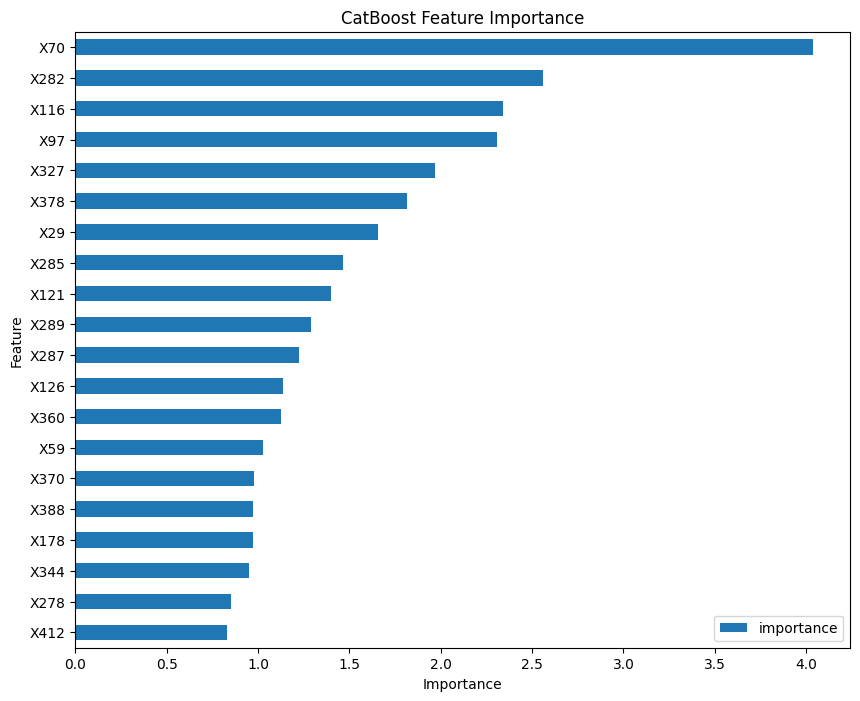

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 변수 중요도 추출
feature_importances = final_clf.get_feature_importance()
feature_names = X_train.columns

# 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='importance', ascending=False)

# 변수 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 8))
importance_df.head(20).plot(kind='barh', x='feature', y='importance', ax=ax)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
plt.show()

In [ ]:
best_lr=0.05
best_depth=8
# 검증용 데이터셋 정의
eval_set = [(X_test, Y_test)]

# 최적의 하이퍼파라미터로 최종 모델 학습
final_clf = CatBoostClassifier(boosting_type='ordered'
                               n_estimators=200,
                               learning_rate=best_lr,
                               depth=best_depth,
                               l2_leaf_reg=0.8,
                               eval_metric='Logloss',
                               verbose=10,  # 학습 진행 상황을 출력
                               thread_count=-1)  # 모든 사용 가능한 CPU 스레드를 사용

final_clf.fit(X_train, Y_train, eval_set=eval_set, early_stopping_rounds=10)

# 최종 모델 평가
final_preds = final_clf.predict(X_test)
# 모델의 모든 파라미터 출력
params = final_clf.get_all_params()
print(f"Actual boosting_type used: {params['boosting_type']}")

0:	learn: 0.6496049	test: 0.6712602	best: 0.6712602 (0)	total: 696ms	remaining: 2m 18s
10:	learn: 0.3617597	test: 0.5251205	best: 0.5251205 (10)	total: 5.18s	remaining: 1m 29s
20:	learn: 0.2083259	test: 0.4394955	best: 0.4394955 (20)	total: 7.6s	remaining: 1m 4s
30:	learn: 0.1365815	test: 0.3928904	best: 0.3928904 (30)	total: 9.56s	remaining: 52.1s
40:	learn: 0.0918950	test: 0.3709091	best: 0.3709091 (40)	total: 11.5s	remaining: 44.7s
50:	learn: 0.0655503	test: 0.3538978	best: 0.3538978 (50)	total: 13.5s	remaining: 39.3s
60:	learn: 0.0492175	test: 0.3378237	best: 0.3378237 (60)	total: 15.7s	remaining: 35.7s
70:	learn: 0.0385426	test: 0.3290239	best: 0.3284141 (69)	total: 18.8s	remaining: 34.1s
80:	learn: 0.0305910	test: 0.3182075	best: 0.3182075 (80)	total: 20.8s	remaining: 30.6s
90:	learn: 0.0248972	test: 0.3109035	best: 0.3109035 (90)	total: 22.7s	remaining: 27.2s
100:	learn: 0.0205389	test: 0.3052923	best: 0.3043597 (96)	total: 24.7s	remaining: 24.2s
110:	learn: 0.0171920	test: 0.30

In [ ]:
best_lr=0.05
best_depth=8
# 검증용 데이터셋 정의
eval_set = [(X_test, Y_test)]

# 최적의 하이퍼파라미터로 최종 모델 학습
final_clf = CatBoostClassifier(boosting_type='Ordered',
                               n_estimators=200,
                               learning_rate=best_lr,
                               depth=best_depth,
                               l2_leaf_reg=0.8,
                               eval_metric='Logloss',
                               verbose=10,  # 학습 진행 상황을 출력
                               thread_count=-1)  # 모든 사용 가능한 CPU 스레드를 사용

final_clf.fit(X_train, Y_train, eval_set=eval_set, early_stopping_rounds=10)

# 최종 모델 평가
final_preds = final_clf.predict(X_test)
# 모델의 모든 파라미터 출력
params = final_clf.get_all_params()
print(f"Actual boosting_type used: {params['boosting_type']}")

0:	learn: 0.6627172	test: 0.6615847	best: 0.6615847 (0)	total: 1.18s	remaining: 3m 55s
10:	learn: 0.4104210	test: 0.5223477	best: 0.5223477 (10)	total: 14.5s	remaining: 4m 9s
20:	learn: 0.2878971	test: 0.4261671	best: 0.4261671 (20)	total: 27.8s	remaining: 3m 56s
30:	learn: 0.2132950	test: 0.3967967	best: 0.3967967 (30)	total: 41.1s	remaining: 3m 43s
40:	learn: 0.1587700	test: 0.3709209	best: 0.3709209 (40)	total: 54.5s	remaining: 3m 31s
50:	learn: 0.1211790	test: 0.3516826	best: 0.3516826 (50)	total: 1m 7s	remaining: 3m 18s
60:	learn: 0.0926916	test: 0.3508447	best: 0.3479984 (54)	total: 1m 21s	remaining: 3m 5s
70:	learn: 0.0719586	test: 0.3485170	best: 0.3436831 (68)	total: 1m 33s	remaining: 2m 50s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3436830889
bestIteration = 68

Shrink model to first 69 iterations.
Actual boosting_type used: Ordered


In [ ]:
# final_preds_cat = final_clf.predict(X_test)
print_all_reg(Y_test, final_preds)

model의 recall 값은 0.611
model의 2종 오류 확률 값은 0.389
model의 Specificity 값은 0.939
model의 1종 오류 확률 값은 0.061
model의 precision 값은 0.846
model의 f1_score 값은 0.710
model의 G-mean 값은 0.758
model의 accuracy 값은 0.824
